# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [2]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd
import numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [3]:
# On importe les données dans un dataframe
df_historique = pd.read_excel('historique_immobilier_paris.xlsx')

df_portefeuille = pd.read_excel('portefeuille_actifs+(3).xlsx')

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [4]:
#On vérifie que le type des données attribué par pandas est cohérent
print(df_historique.dtypes,'\n',df_portefeuille.dtypes
)

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object 
 adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [5]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')

print(set(df_historique['type_local']))


la liste des différents types de biens immobiliers que nous avons dans les données est ?:
{'Local industriel. commercial ou assimilé', 'Appartement'}


On observe qu'il y a ? types de biens, et que leurs codes types sont ?. 

### 3. Nombre de transactions

In [6]:
# On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ?',len(df_historique['date_mutation']))
print(
    "le nombre de transactions pour les appartements dans les données est ?",
    len(df_historique['date_mutation'].loc[df_historique["type_local"] == "Appartement"]),
)
print(
    "le nombre de transactions pour les locaux commerciaux dans les données est ?",
    len(
        df_historique.loc[
            df_historique["type_local"] == "Local industriel. commercial ou assimilé"
        ]
    ),
)

le nombre de transactions dans les données est ? 26196
le nombre de transactions pour les appartements dans les données est ? 24353
le nombre de transactions pour les locaux commerciaux dans les données est ? 1843


### 4. interval de l'historique des données

In [7]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ?',min(df_historique['date_mutation']))
print('la dernière date de transaction dans les données est le ?',max(df_historique['date_mutation']))

la première date de transaction dans les données est le ? 2017-01-02 00:00:00
la dernière date de transaction dans les données est le ? 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [8]:
# Calcul de la colonne
df_historique['prix_m2'] = round(df_historique['valeur_fonciere']/df_historique['surface_reelle'])
df_historique['prix_m2']

0        11011.0
1         9672.0
2         9966.0
3        11368.0
4        11751.0
          ...   
26191    12736.0
26192    13216.0
26193    12017.0
26194    12017.0
26195    11545.0
Name: prix_m2, Length: 26196, dtype: float64

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [9]:
# On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_historique.head()

# on peut supprimer l'adresse,adresse numéro, longitude, latitude, code postal, nombre pièce principale
df_historique.drop(
    columns={
        "adresse_numero",
        "adresse_nom_voie"
    },
    inplace=True,
)

#Creation dataframe exclusif au appartemant
df_historique_appartemant = df_historique.loc[
    df_historique["code_type_local"] == 2
]


In [10]:
# Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_historique_appartemant["année"] = df_historique["date_mutation"].dt.year
df_grouped_prix_moyen = df_historique_appartemant.groupby(by='année')['prix_m2'].mean()

C:\Users\leo morel\AppData\Local\Temp\ipykernel_28032\3125645425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_historique_appartemant["année"] = df_historique["date_mutation"].dt.year


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

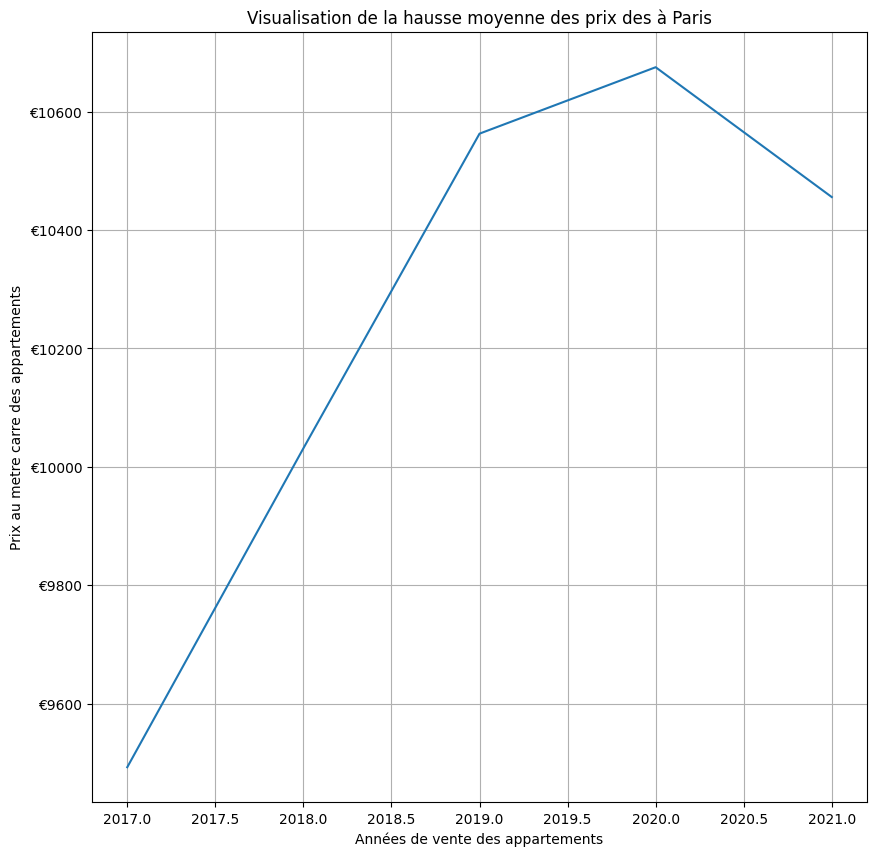

In [11]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(df_grouped_prix_moyen)
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [12]:
#Liste des codes postaux dans nos données.
if len(set(df_historique_appartemant['code_postal'])) == 20 :
   print('il y a 20 valeurs, donc juste')
else : 
   print("il n'y a pas 20 valeurs, donc a revoir")

il y a 20 valeurs, donc juste


In [13]:
# Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_evol_arrondissement = df_historique_appartemant.groupby(by='année')[['code_postal','prix_m2']]

first_arrondissement = df_historique_appartemant.loc[df_historique_appartemant['code_postal']==75001]
first_arrondissement = first_arrondissement.groupby(by='année')['prix_m2'].mean()

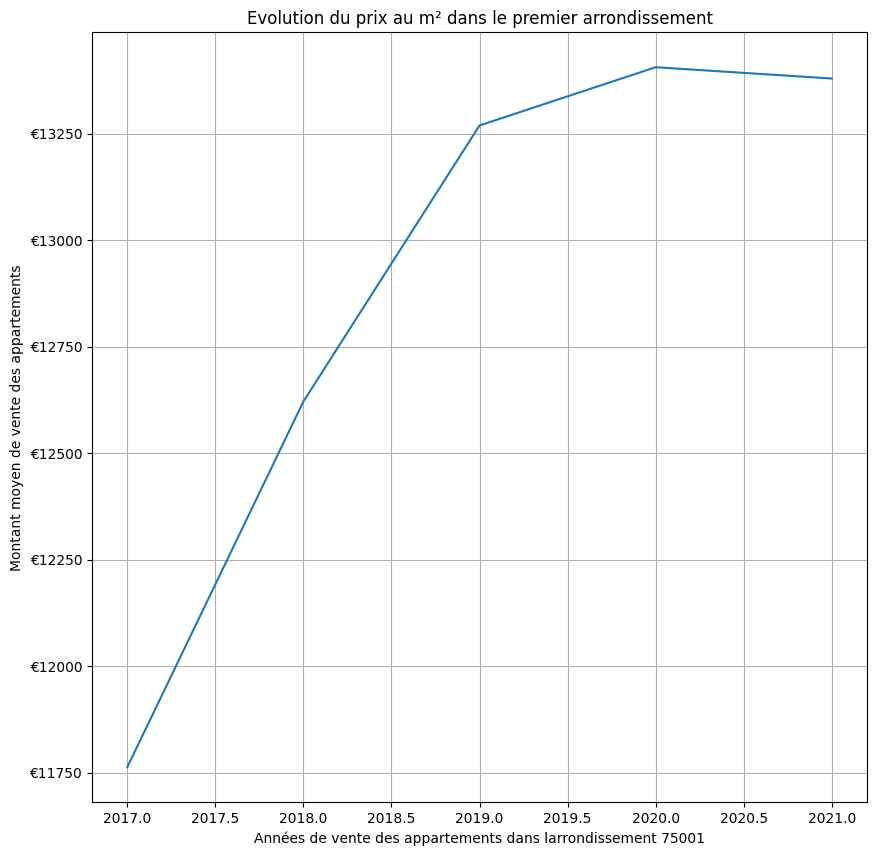

In [14]:
# Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(10,10))
plt.plot(first_arrondissement)
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

In [15]:
# étapes avant le graphique 

evolution_arrondissement = (
    df_historique_appartemant.groupby(["nom_commune", "année"])["prix_m2"].mean().reset_index()
)
print(len(evolution_arrondissement))

100


In [16]:
evolution_arrondissement.head()

,nom_commune,année,prix_m2
0,Paris 10e Arrondissement,2017,8747.007752
1,Paris 10e Arrondissement,2018,9328.013216
2,Paris 10e Arrondissement,2019,9999.142308
3,Paris 10e Arrondissement,2020,10200.349515
4,Paris 10e Arrondissement,2021,10043.456522


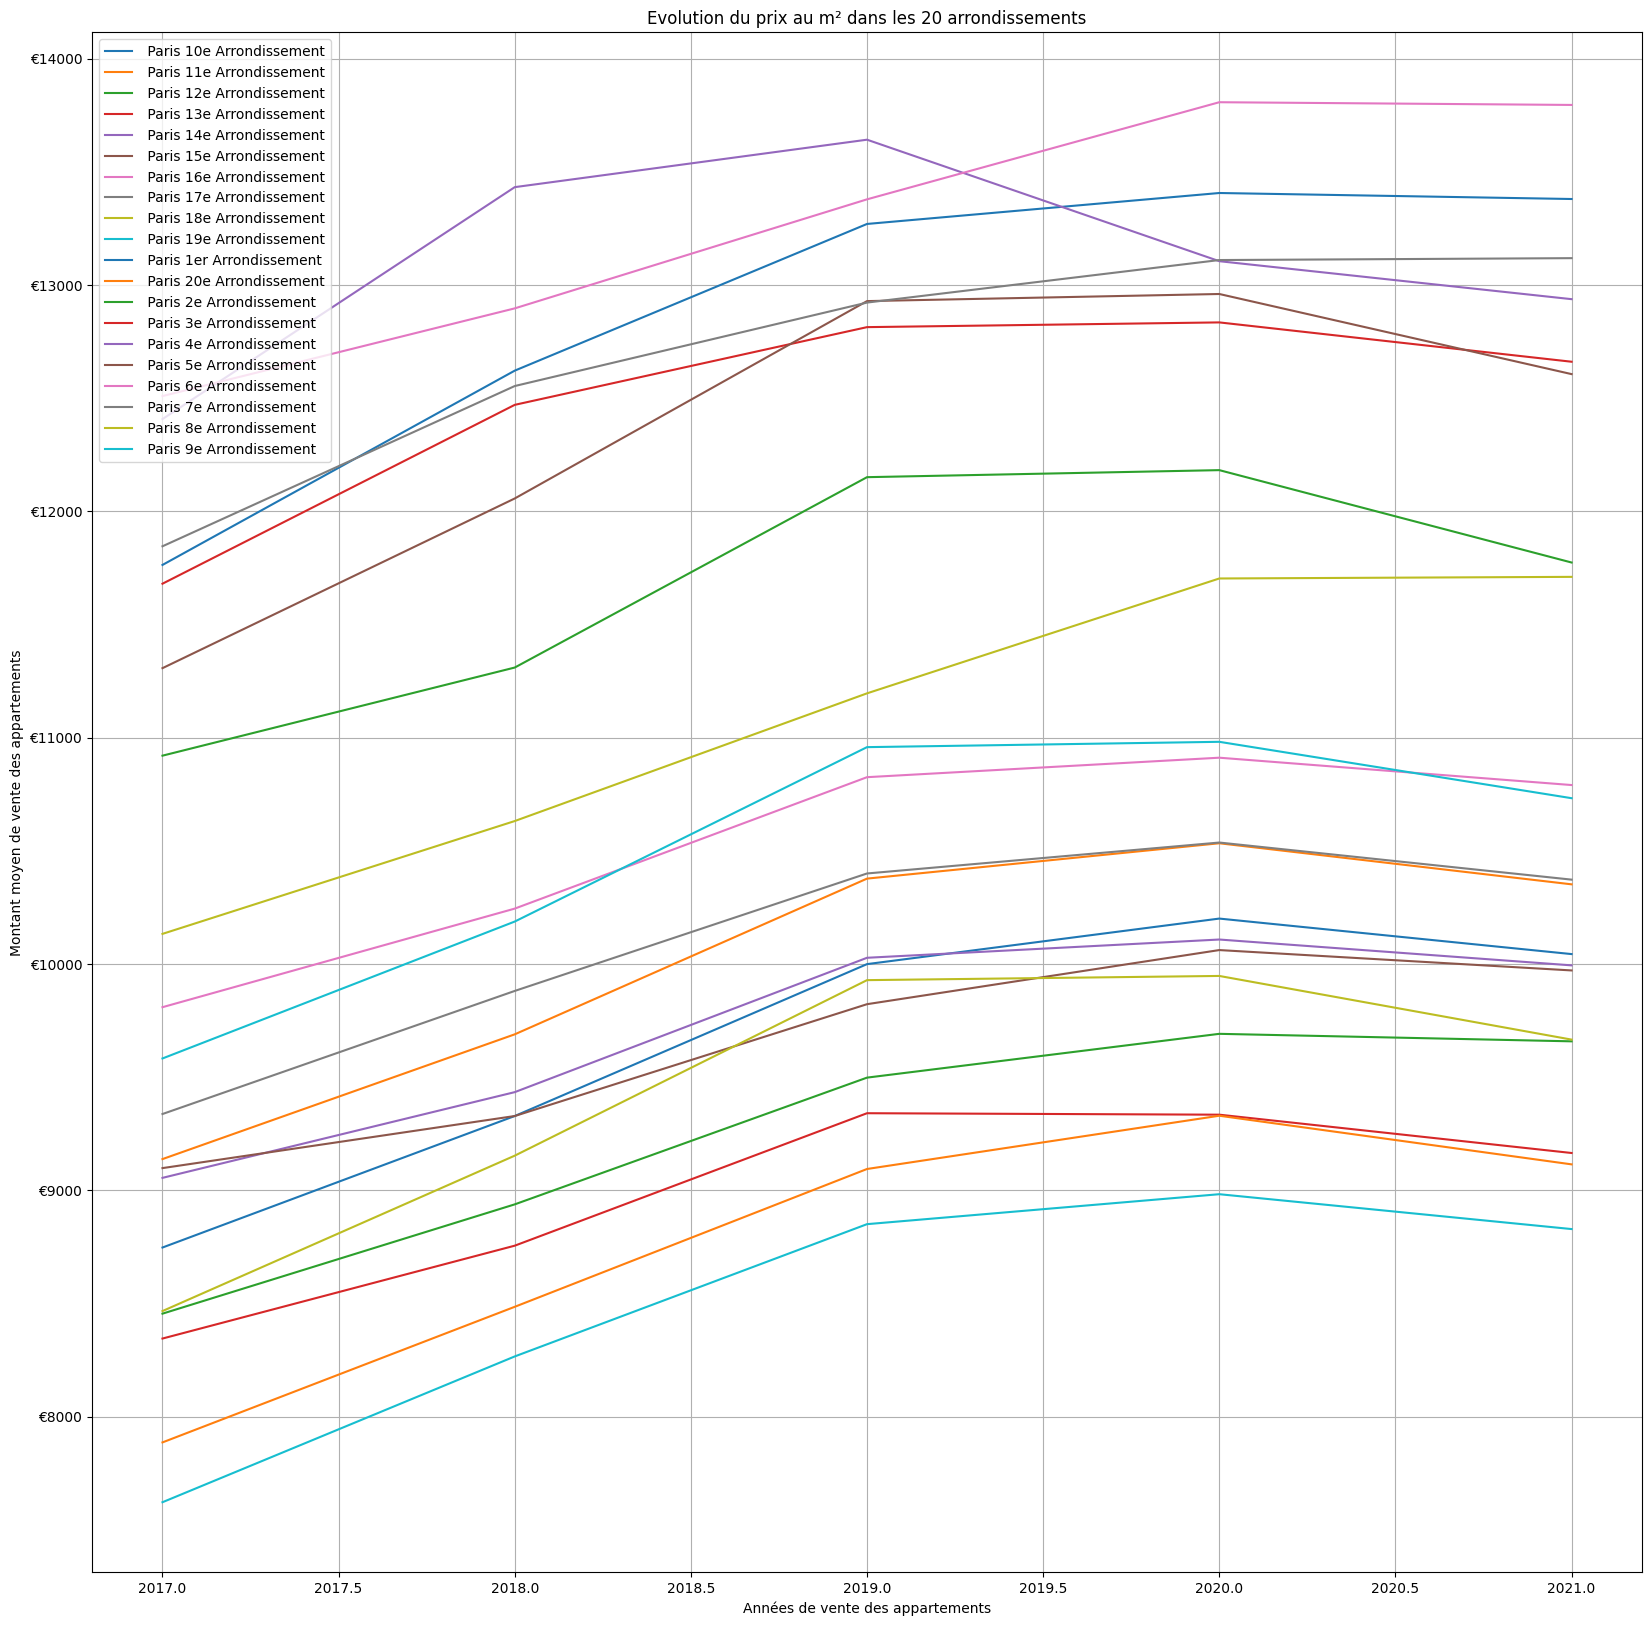

In [17]:
# On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(20,20))
interval_historique=['2017','2018','2019','2020','2021']
grouped_arrondissement = df_historique_appartemant[["année", "prix_m2", "code_postal"]].loc[df_historique_appartemant['code_postal']==75002]
grouped_arrondissement.groupby(by='code_postal')


# Insérer les lignes à tracer ci-dessous
for arrondissement in evolution_arrondissement["nom_commune"].unique():
    data_arrondissement = evolution_arrondissement[evolution_arrondissement["nom_commune"] == arrondissement]
    plt.plot(data_arrondissement['année'], data_arrondissement['prix_m2'], label=f' {arrondissement}')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement que ?

Tout les arrondissement ont vu leur prix au m² augmentés, mise à part en 2021 ou les prix on légèrement baisser

### 7. Prix au metre carré par transaction dans un arrondissement

In [18]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
sixieme_arrondiment = df_historique.loc[df_historique['code_postal']==75006]
print(sixieme_arrondiment.count())


date_mutation      782
valeur_fonciere    782
code_postal        782
nom_commune        782
code_type_local    782
type_local         782
surface_reelle     782
prix_m2            782
dtype: int64


On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

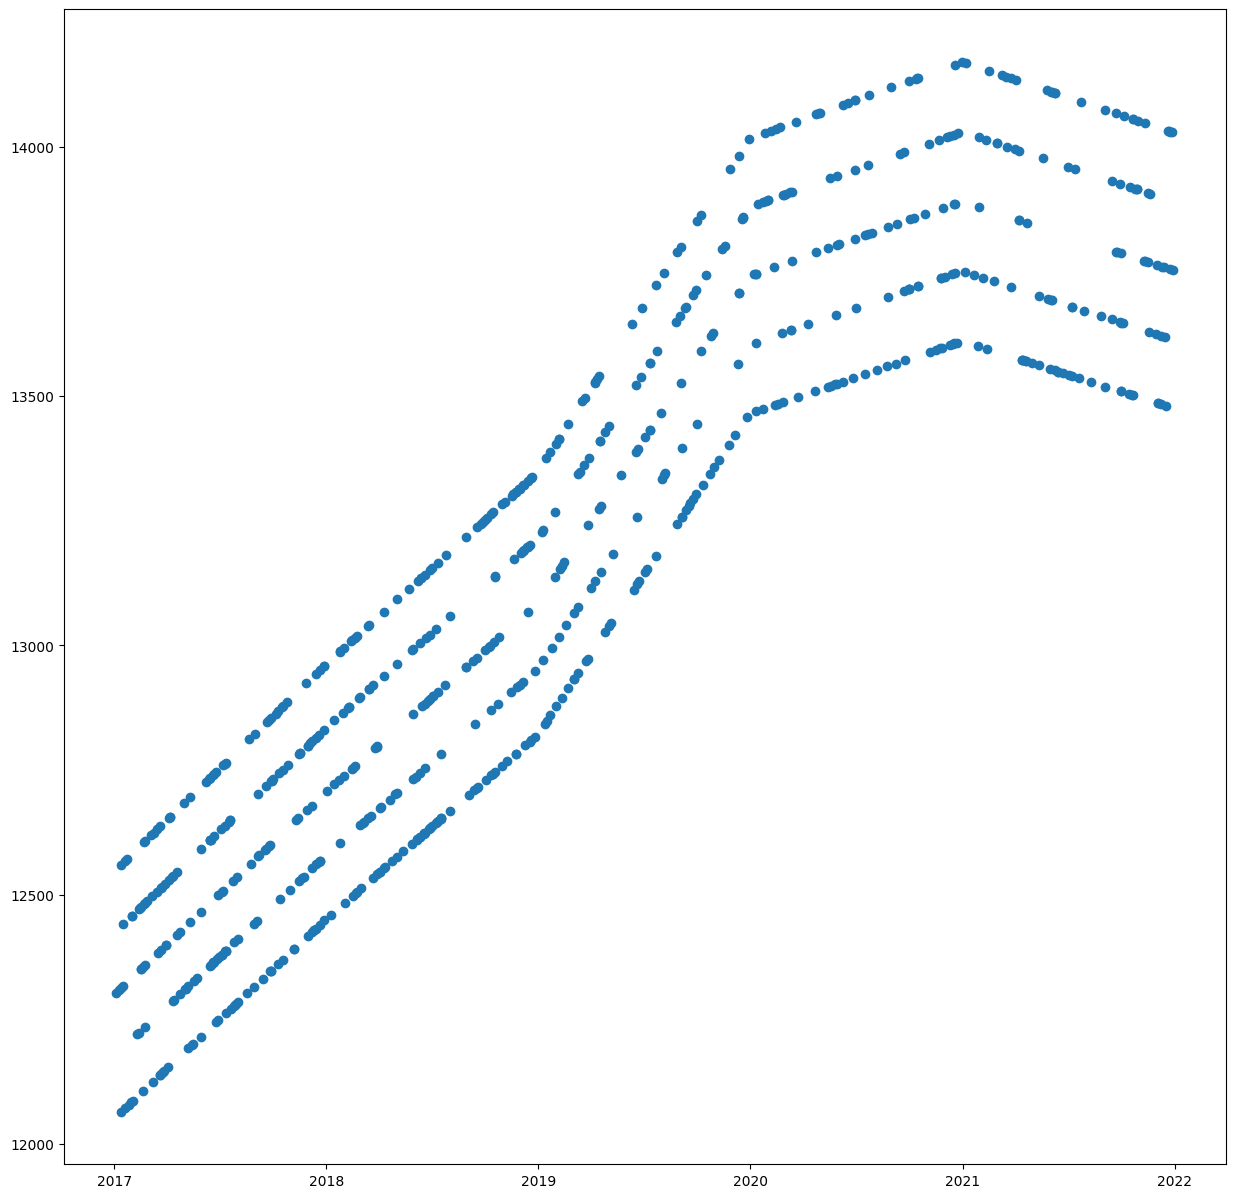

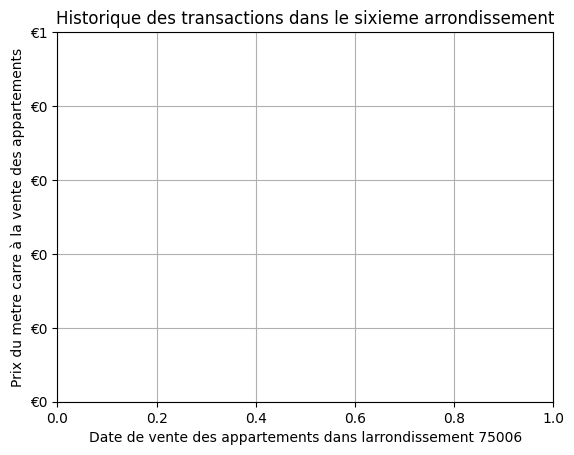

In [19]:
cp=75006
arrondissement_6 = df_historique_appartemant.loc[
    df_historique_appartemant["code_postal"] == 75006
]

plt.figure(figsize=(15,15))


# Insérer ci-dessous le scatter plot


x=arrondissement_6['date_mutation']
y=arrondissement_6['prix_m2']


plt.scatter(x,y)
plt.show()


plt.xlabel('Date de vente des appartements dans larrondissement 75006')


plt.ylabel('Prix du metre carre à la vente des appartements')


formatter = ticker.FormatStrFormatter('€%d')


plt.gca().yaxis.set_major_formatter(formatter)


plt.ylim(0,1)


plt.grid(which='both')


plt.title('Historique des transactions dans le sixieme arrondissement')


plt.show()

On observe que ?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [20]:
import scipy.stats as personsr
import seaborn as sns

<Axes: xlabel='année', ylabel='prix_m2'>

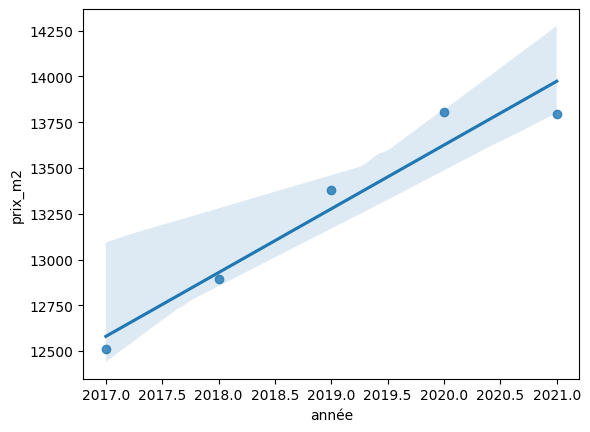

In [21]:
df_correlation = arrondissement_6.groupby(by=['année'])['prix_m2'].mean().reset_index()
x=df_correlation['année']
y=df_correlation['prix_m2']
sns.regplot(y=y,x=x)

In [22]:
# On calcule la corrélation de Spearman
from scipy.stats import stats

correlation_coefficient, p_value = stats.spearmanr(df_correlation["prix_m2"], df_correlation["année"])
print("Coefficient de corrélation de Spearman :", correlation_coefficient)
print("P-value :", p_value)

Coefficient de corrélation de Spearman : 0.8999999999999998
P-value : 0.03738607346849874


C:\Users\leo morel\AppData\Local\Temp\ipykernel_28032\3064768319.py:4: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  correlation_coefficient, p_value = stats.spearmanr(df_correlation["prix_m2"], df_correlation["année"])


Le coefficient de corrélation est de ? avec une pvalue de ? donc nous pouvons confirmer la corrélation.

Le coefficient de corrélation est de 0,89 , avec une pvalue de 0,037

On peut confirmer que la correlation entre les prix au m² et les années sont correléer positivement, c'est a dire quand les années augmentes les prix m² augmente aussi.
On peut aussi voir que la valeur de plvalue montrant si la correlation est peut être du au hasard, en l'occurence on trouver 0,03 ce qui est faible et qui montre que la correlation 
est peut probable de se produire par hasard

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [23]:
df_correlation_surface = df_historique_appartemant[['surface_reelle','valeur_fonciere']].loc[df_historique_appartemant['code_postal']==75006]

correlation_coefficient, p_value = stats.spearmanr(
    df_correlation_surface["valeur_fonciere"], df_correlation_surface["surface_reelle"]
)
print("Coefficient de corrélation de Spearman :", round(correlation_coefficient,3))
print("P-value :", p_value)

Coefficient de corrélation de Spearman : 0.998
P-value : 0.0


C:\Users\leo morel\AppData\Local\Temp\ipykernel_28032\4262315019.py:3: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  correlation_coefficient, p_value = stats.spearmanr(


Le coefficient de corrélation est de ? avec une pvalue de ?. La relation est donc confirmée.

On peut voir que le coefficient de corrélation est de ,998 soit trsè proche de 1, soit que la valeur foncières et directement corrélé à la surface, autrement dis plus la surface augmente plus la valeur foncière augmente

On peut voir aussi que pvalue est égale à 0 soit il est impossible que la corrélation se produise par hasard

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [24]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux = df_historique.loc[df_historique['code_type_local']==4]

#étape d'ajustement de données pour la suite
df_locaux['années'] = df_locaux['date_mutation'].dt.year
df_locaux["prix_m2"] = df_locaux['valeur_fonciere']/df_locaux['surface_reelle']

C:\Users\leo morel\AppData\Local\Temp\ipykernel_28032\1024022451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_locaux['années'] = df_locaux['date_mutation'].dt.year
C:\Users\leo morel\AppData\Local\Temp\ipykernel_28032\1024022451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_locaux["prix_m2"] = df_locaux['valeur_fonciere']/df_locaux['surface_reelle']


In [25]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_grouped_m2 = df_locaux.groupby(by='années')['prix_m2'].mean().reset_index()

df_appartement = df_historique_appartemant.groupby(by='année')['prix_m2'].mean().reset_index()

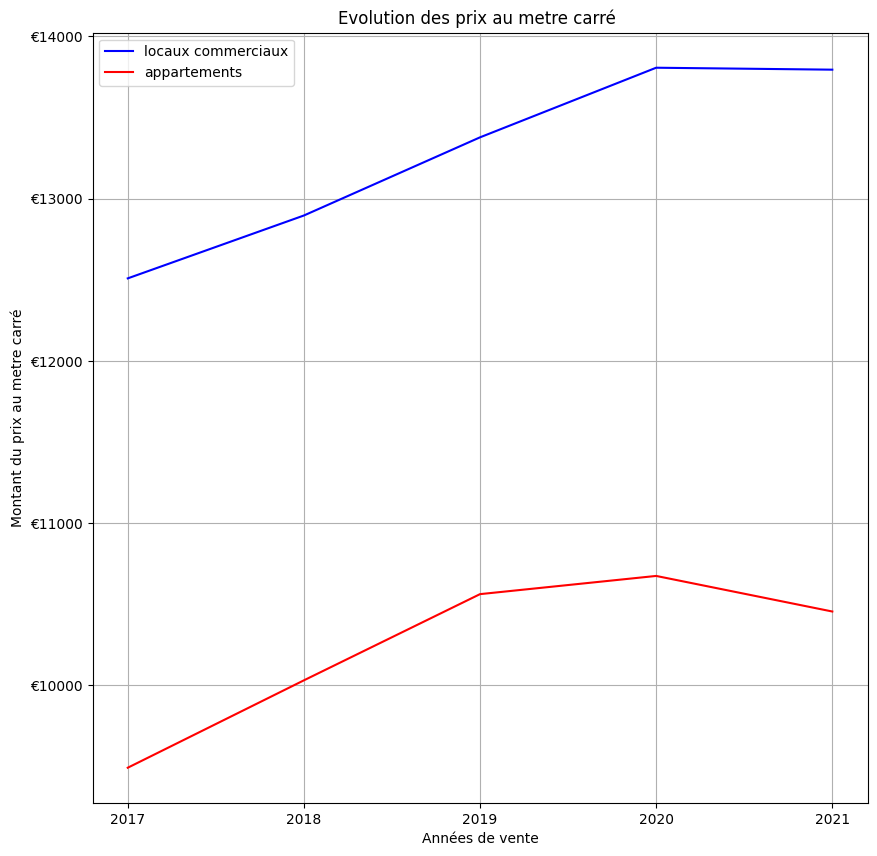

In [26]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
y1 = df_grouped_m2['prix_m2']
plt.plot(['2017','2018','2019','2020','2021'],y,label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df_appartement['prix_m2'],label='appartements',color='red')
plt.plot()
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?

Le prix au metre carré des locs commerciaux sont plsu élevée que les appartements

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [27]:
# Importation OneHotencoder
from sklearn.preprocessing import OneHotEncoder

In [28]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohe_transform = ohe.fit_transform(df_historique[["code_type_local", "code_postal"]])
ohe_transform = pd.concat([df_historique, ohe_transform], axis=1).drop(
    columns=["code_postal", "code_type_local"]
)

In [29]:
ohe_transform.head(1)

,date_mutation,valeur_fonciere,nom_commune,type_local,surface_reelle,prix_m2,code_type_local_2,code_type_local_4,code_postal_75001,code_postal_75002,...,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020
0,2017-01-03,550559.678082,Paris 3e Arrondissement,Appartement,50,11011.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# avec get dummies pandas
df_transform = pd.get_dummies(df_historique,columns=['code_type_local','code_postal'])
# Affichez les résultats
print("\nRésultat de get_dummies :")
df_transform.head(1)


Résultat de get_dummies :


,date_mutation,valeur_fonciere,nom_commune,type_local,surface_reelle,prix_m2,code_type_local_2,code_type_local_4,code_postal_75001,code_postal_75002,...,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020
0,2017-01-03,550559.678082,Paris 3e Arrondissement,Appartement,50,11011.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [31]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X = ohe_transform.drop(columns=["date_mutation","valeur_fonciere","nom_commune","type_local","surface_reelle","prix_m2"],axis=1)
y = df_transform["valeur_fonciere"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [32]:
# conversion des données en str
X_train =X_train.astype(str)
X_test =X_test.astype(str)
y_train =y_train.astype(str)
y_test = y_test.astype(str)

In [33]:
from sklearn.linear_model import LinearRegression
# On entraîne l'algorithme ci-dessous et on effectue la prédiction
reg = LinearRegression()
reg.fit(X_train,y_train)
# Maintenant, vous pouvez utiliser votre modèle entraîné pour faire des prédictions sur de nouvelles données
# Supposons que vous avez de nouvelles données dans un DataFrame appelé df_new
# Assurez-vous que df_new a les mêmes colonnes que X_train
# Vous devez également convertir ces données en chaînes de caractères si nécessaire

# Faire des prédictions
resultat_historique = reg.predict(X_test)
print(resultat_historique[:10])

# Score, moyenne d'erreur
score_algo = reg.score(X_test, y_test)
print(
    "l'algorithm fais en moyenne",
    round(score_algo*100),
    "% d'erreur en moyenne",
)


[355040. 602112. 346016. 346016. 850016. 346016. 467264. 719168. 355040.
 467264.]
l'algorithm fais en moyenne 9 % d'erreur en moyenne


In [34]:
df_portefeuille.columns

Index(['adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_commune', 'surface_carrez', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'longitude',
       'latitude'],
      dtype='object')

Notre algorithme fait donc ? % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- ? La valeur fonciere est directement corréler a la date et par le type de local (appartement, loc commerc),et le code postal
- ? Etant donner que l'algorithme fait peut d'erreur en moyenne (9%) on peut conclure que la prédiction est assez fiable
- ? 
- ?

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

# Milestone 3 - Prédiction définitive pour le client 

In [35]:
#On importe les données dans un dataframe
df_pf = df_portefeuille.drop(columns=["surface_carrez","longitude","latitude","adresse_nom_voie","nom_commune","type_local","code_commune"],axis=1)


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [36]:
# On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles / avec get_dummies

#ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
pf_transform = ohe.fit_transform(df_pf[["code_type_local", "code_postal"]])
pf_transform = pd.concat([df_pf, pf_transform], axis=1).drop(
    columns=["code_postal", "code_type_local"]
)

# On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

pf_transform['Date'] = dt.date(2022,12,31)

In [37]:
# Conversion du dataframe en str
pf_transform =pf_transform.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [38]:
# Valorisation du portefeuille sur le segment des particuliers
reg=LinearRegression()
X_train = ohe_transform.drop(
    columns=[
        "date_mutation",
        "valeur_fonciere",
        "nom_commune",
        "type_local",
        "surface_reelle",
        "prix_m2",
        "code_type_local_4"
    ],
    axis=1,
)
y_train= ohe_transform['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(
    X_train,y_train, test_size=0.2, random_state=42
)

x = pf_transform.drop(columns=['adresse_numero', 'surface_reelle_bati', 'nombre_pieces_principales','code_type_local_4','Date'],axis=1)
reg.fit(X_train,y_train)
resultat = reg.predict(x)


print(
    "la valorisation du segment particulier est (en millions deuros): {:,}".format(
        resultat.sum()
    )
)

la valorisation du segment particulier est (en millions deuros): 185,263,520.0


In [42]:
# Valorisation du portefeuille sur le segment corporate


X = ohe_transform.drop(
    columns=[
        "date_mutation",
        "valeur_fonciere",
        "nom_commune",
        "type_local",
        "surface_reelle",
        "prix_m2",
        "code_type_local_2",
    ],
    axis=1,
)
y = ohe_transform["valeur_fonciere"]

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)
x = pf_transform.drop(
    columns=[
        "adresse_numero",
        "surface_reelle_bati",
        "nombre_pieces_principales",
        "code_type_local_2",
        "Date",
    ],
    axis=1,
)
reg.fit(X_train, y_train)
resultat_corporate = reg.predict(x)

print(
    "la valorisation du segment corporate est (en millions deuros): {:,}".format(
        resultat_corporate.sum()))

la valorisation du segment corporate est (en millions deuros): 185,272,016.0


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- particulier = 185 263 520 €
- Corporate =  185 272 016 €

Cependant les estimation de l'algorthme ce base sur la seulement les arrondissement et les type de local pour une prédiction des bien

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [46]:
# On importe les données dans un dataframe>

df_echantillon = pd.read_excel("echantillon_a_classer2.xlsx")

In [47]:
df_echantillon.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [48]:
df_echantillon['prix_m2'] = df_echantillon['valeur_fonciere']/df_echantillon['surface_reelle']

df_echantillon.drop(
    columns=["valeur_fonciere", "surface_reelle",], inplace=True
)
df_echantillon = pd.get_dummies(df_echantillon, columns=["nom_commune"])

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [49]:
from sklearn.cluster import KMeans

k = 2

# Créer un objet KMeans
kmeans = KMeans(n_clusters=k)

# Adapter le modèle aux données
kmeans.fit(df_echantillon)

# Obtenir les étiquettes de cluster pour chaque point de données
labels = kmeans.labels_

# Obtenir les coordonnées des centroïdes
centroids = kmeans.cluster_centers_

In [50]:
# On vérifie les données de la prédiction
print(centroids)

[[7.50190000e+04 7.40877503e+03 1.00000000e+00]
 [7.50190000e+04 9.80692467e+03 1.00000000e+00]]


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

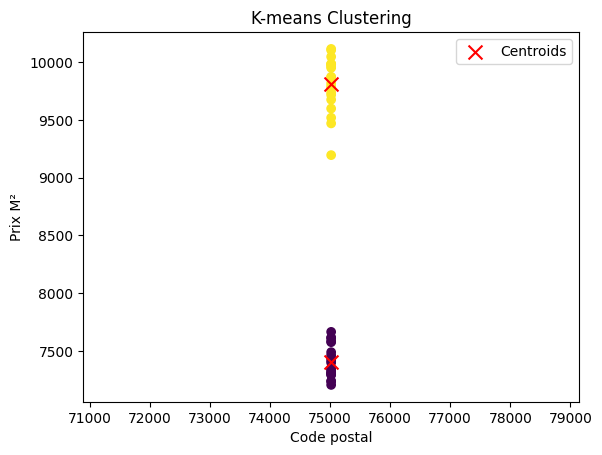

In [51]:
# On affiche les résultats

labels_named = ['Appartement' if label == 0 else 'Local Commercial' for label in labels]
df_echantillon['labels_named'] = labels_named



plt.scatter(
    df_echantillon.iloc[:, 0],
    df_echantillon.iloc[:, 1],
    c=labels,
    cmap="viridis",)
plt.scatter(
    centroids[:, 0], centroids[:, 1], marker="x", s=100, c="red", label="Centroids"
)
plt.xlabel("Code postal")
plt.ylabel("Prix M²")
plt.title("K-means Clustering")
plt.legend()
plt.show()

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- L'algorithme à réussi a couper le jeux de donnée en 2 cluster (appartement, locaux commerciaux)
   - On peut voir la différence du prix m² entre les locaux et les appartements

- ?